In [1]:
import PIL.ImageOps
from PIL import Image
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
import pickle as cPickle

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
InteractiveShell.ast_node_interactivity = "all"

# load the model from disk
model_name = 'finalized_model2.sav'
loaded_model = cPickle.load(open(model_name, 'rb'))


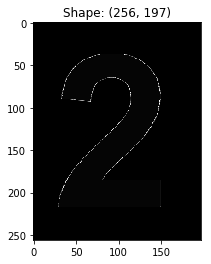

In [3]:
filename = '2.png'

image = Image.open(filename)
p = plt.imshow(np.asarray(image), cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(np.asarray(image).shape))

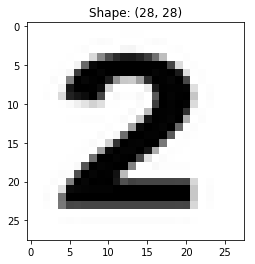

In [4]:
# convert to grayscale image - 'L' format means each pixel is
# represented by a single value from 0 to 255
image_bw = image.convert('L')
p = plt.imshow(np.asarray(image_bw), cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(np.asarray(image_bw).shape))
# resize image
image_bw_resized = image_bw.resize((28, 28), Image.ANTIALIAS)
p = plt.imshow(np.asarray(image_bw_resized), cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized).shape))

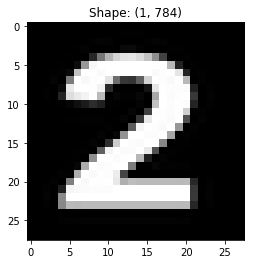

In [5]:
# invert image, to match training data

image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
p = plt.imshow(np.asarray(image_bw_resized_inverted), cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted).shape))

# adjust contrast and scale
pixel_filter = 20  # value from 0 to 100 - may need to adjust this manually
min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
image_bw_resized_inverted_scaled = np.clip(
    image_bw_resized_inverted-min_pixel, 0, 255)
max_pixel = np.max(image_bw_resized_inverted)
image_bw_resized_inverted_scaled = np.asarray(
    image_bw_resized_inverted_scaled)/max_pixel
p = plt.imshow(np.asarray(image_bw_resized_inverted_scaled), cmap=plt.cm.gray,)
p = plt.title(
    'Shape: ' + str(np.asarray(image_bw_resized_inverted_scaled).shape))

# finally, reshape to (1, 784) - 1 sample, 784 features
test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1, 784)
p = plt.imshow(np.reshape(test_sample, (28, 28)), cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(test_sample.shape))
p = plt.imshow(np.reshape(test_sample, (28, 28)), cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(test_sample.shape))

In [6]:
test_pred = loaded_model.predict(test_sample)
print("Predicted class is: ", test_pred)

Predicted class is:  ['2']
